# House Price Prediction using PYSPARK

# Overview

Whenever you ask someone what do they look in their dream home, most people will say rooms, yard, garage, locality. However, there are lots of factor that affect a house price. No doubt, locality, area are some of the important factors in price determination, however there are behemoth of other attributes like basement type, basement material, Lot Frontage, Street area in front of the house to name a few.

This dataset is taken from an ongoing kaggle dataset for predicting the price of a house. This dataset is a big dataset with over 81 features. This dataset represents house prices in various localities in Ames, Iowa.

The analysis has been in done in PySpark 1.6 on Cloudera platform


### Data
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Architectural Diagram

In [3]:
from IPython.display import Image
Image("/home/cloudera/Downloads/work flow.JPG")

### Importing Libraries and creating RDD

In [4]:
#Boiler plate Imports Pyspark SQL, SQL COntext and reading the train.csv i.e the dataset

sc
from pyspark.sql import SQLContext,Row
from pyspark import SparkConf,SparkContext
import numpy as np
import pandas as pd
rdd=sc.textFile("file:///home/cloudera/Downloads/train.csv") 


In [5]:
#Removing the header row
header=rdd.first()

rddheader = rdd.first()
header = sc.parallelize([rddheader])
rdddata = rdd.subtract(header)

In [6]:
#Fuction to define and take in all the variables.
def myfunc(line):
    l1=line.split(",")
    return Row(Id=l1[0],MSSubClass=l1[1],MSZoning=l1[2],LotFrontage=str(l1[3]),
               LotArea=str(l1[4]),Street=l1[5],Alley=l1[6],
               LotShape=l1[7],LandContour=l1[8],Utilities=l1[9],LotConfig=l1[10],
               LandSlope=l1[11],Neighborhood=l1[12],Condition1=l1[13],Condition2=l1[14],BldgType=l1[15],
               HouseStyle=l1[16],OverallQual=l1[17],OverallCond=l1[18],YearBuilt=l1[19],YearRemodAdd=l1[20],
               RoofStyle=l1[21],RoofMatl=l1[22],Exterior1st=l1[23],Exterior2nd=l1[24],MasVnrType=l1[25],
               MasVnrArea=l1[26],ExterQual=l1[27],ExterCond=l1[28],Foundation=l1[29],BsmtQual=l1[30],
               BsmtCond=l1[31],BsmtExposure=l1[32],BsmtFinType1=l1[33],BsmtFinSF1=str(l1[34]),BsmtFinType2=l1[35],
               BsmtFinSF2=str(l1[36]),BsmtUnfSF=str(l1[37]),TotalBsmtSF=str(l1[38]),Heating=l1[39],HeatingQC=l1[40],
               CentralAir=l1[41],Electrical=l1[42],firstFlrSF=str(l1[43]),secondFlrSF=str(l1[44]),LowQualFinSF=l1[45],
               GrLivArea=str(l1[46]),BsmtFullBath=str(l1[47]),BsmtHalfBath=str(l1[48]),FullBath=str(l1[49]),
               HalfBath=str(l1[50]),BedroomAbvGr=str(l1[51]),KitchenAbvGr=str(l1[52]),KitchenQual=l1[53],
               TotRmsAbvGrd=str(l1[54]),Functional=l1[55],Fireplaces=str(l1[56]),
               FireplaceQu=l1[57],GarageType=l1[58],GarageYrBlt=l1[59],GarageFinish=l1[60],
               GarageCars=str(l1[61]),GarageArea=str(l1[62]),GarageQual=l1[63],GarageCond=l1[64],PavedDrive=l1[65],
               WoodDeckSF=str(l1[66]),OpenPorchSF=str(l1[67]),EnclosedPorch=str(l1[68]),threeSsnPorch=str(l1[69]),
               ScreenPorch=str(l1[70]),PoolArea=str(l1[71]),PoolQC=l1[72],Fence=l1[73],MiscFeature=l1[74],
               MiscVal=str(l1[75]),MoSold=l1[76],YrSold=l1[77],SaleType=l1[78],SaleCondition=l1[79],SalePrice=str(l1[80]))
 

In [7]:
res=rdddata.map(myfunc)

In [8]:
    res.take(2)

[Row(Alley=u'NA', BedroomAbvGr='2', BldgType=u'1Fam', BsmtCond=u'NA', BsmtExposure=u'NA', BsmtFinSF1='0', BsmtFinSF2='0', BsmtFinType1=u'NA', BsmtFinType2=u'NA', BsmtFullBath='0', BsmtHalfBath='0', BsmtQual=u'NA', BsmtUnfSF='0', CentralAir=u'N', Condition1=u'Norm', Condition2=u'Norm', Electrical=u'SBrkr', EnclosedPorch='0', ExterCond=u'TA', ExterQual=u'TA', Exterior1st=u'AsbShng', Exterior2nd=u'AsbShng', Fence=u'NA', FireplaceQu=u'NA', Fireplaces='0', Foundation=u'Slab', FullBath='1', Functional=u'Typ', GarageArea='0', GarageCars='0', GarageCond=u'NA', GarageFinish=u'NA', GarageQual=u'NA', GarageType=u'NA', GarageYrBlt=u'NA', GrLivArea='912', HalfBath='0', Heating=u'GasA', HeatingQC=u'Gd', HouseStyle=u'1.5Fin', Id=u'1219', KitchenAbvGr='1', KitchenQual=u'TA', LandContour=u'Lvl', LandSlope=u'Gtl', LotArea='6240', LotConfig=u'Inside', LotFrontage='52', LotShape=u'Reg', LowQualFinSF=u'0', MSSubClass=u'50', MSZoning=u'RM', MasVnrArea=u'0', MasVnrType=u'None', MiscFeature=u'NA', MiscVal='0'

In [9]:
sqlcontext=SQLContext(sc)

In [10]:
temp=sqlcontext.createDataFrame(res)

In [11]:

temp.dtypes

[('Alley', 'string'),
 ('BedroomAbvGr', 'string'),
 ('BldgType', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinSF1', 'string'),
 ('BsmtFinSF2', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinType2', 'string'),
 ('BsmtFullBath', 'string'),
 ('BsmtHalfBath', 'string'),
 ('BsmtQual', 'string'),
 ('BsmtUnfSF', 'string'),
 ('CentralAir', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('Electrical', 'string'),
 ('EnclosedPorch', 'string'),
 ('ExterCond', 'string'),
 ('ExterQual', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('Fence', 'string'),
 ('FireplaceQu', 'string'),
 ('Fireplaces', 'string'),
 ('Foundation', 'string'),
 ('FullBath', 'string'),
 ('Functional', 'string'),
 ('GarageArea', 'string'),
 ('GarageCars', 'string'),
 ('GarageCond', 'string'),
 ('GarageFinish', 'string'),
 ('GarageQual', 'string'),
 ('GarageType', 'string'),
 ('GarageYrBlt', 'string'),
 ('GrLivArea', 'string'),
 ('HalfBath', 'string'),
 ('H

In [12]:
temp.registerTempTable("temp_table")

In [13]:
sqlcontext.sql("select * from temp_table")

DataFrame[Alley: string, BedroomAbvGr: string, BldgType: string, BsmtCond: string, BsmtExposure: string, BsmtFinSF1: string, BsmtFinSF2: string, BsmtFinType1: string, BsmtFinType2: string, BsmtFullBath: string, BsmtHalfBath: string, BsmtQual: string, BsmtUnfSF: string, CentralAir: string, Condition1: string, Condition2: string, Electrical: string, EnclosedPorch: string, ExterCond: string, ExterQual: string, Exterior1st: string, Exterior2nd: string, Fence: string, FireplaceQu: string, Fireplaces: string, Foundation: string, FullBath: string, Functional: string, GarageArea: string, GarageCars: string, GarageCond: string, GarageFinish: string, GarageQual: string, GarageType: string, GarageYrBlt: string, GrLivArea: string, HalfBath: string, Heating: string, HeatingQC: string, HouseStyle: string, Id: string, KitchenAbvGr: string, KitchenQual: string, LandContour: string, LandSlope: string, LotArea: string, LotConfig: string, LotFrontage: string, LotShape: string, LowQualFinSF: string, MSSub

In [14]:
#Printing the schema of the Dataset
temp.printSchema()

root
 |-- Alley: string (nullable = true)
 |-- BedroomAbvGr: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- BsmtCond: string (nullable = true)
 |-- BsmtExposure: string (nullable = true)
 |-- BsmtFinSF1: string (nullable = true)
 |-- BsmtFinSF2: string (nullable = true)
 |-- BsmtFinType1: string (nullable = true)
 |-- BsmtFinType2: string (nullable = true)
 |-- BsmtFullBath: string (nullable = true)
 |-- BsmtHalfBath: string (nullable = true)
 |-- BsmtQual: string (nullable = true)
 |-- BsmtUnfSF: string (nullable = true)
 |-- CentralAir: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- Electrical: string (nullable = true)
 |-- EnclosedPorch: string (nullable = true)
 |-- ExterCond: string (nullable = true)
 |-- ExterQual: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- Exterior2nd: string (nullable = true)
 |-- Fence: string (nullable = true)
 |-- FireplaceQu: string (nulla

In [15]:
    len(temp.columns)

81

# Visualization

In this section, we will create plots to get visual representation from our data.

We will ask some questions and see the results

The logic has been created using PySpark

## Importing required libraries

In [16]:
#Importing Libraries to visualize the data
#Rahul's Start
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
temp.columns

['Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'Sal

##### Calculating Total Number of localities in our dataset

In [18]:
##Visualization 1--Total number of localities

locality_count=temp.select('Neighborhood').distinct()
locality_count.count()

25

It can be clearly seen that our dataset contain information about 25 localities of Ames

#### Let us now see the names of these localities

In [19]:
##Visualization 2--Names of localities

locality_name=temp.select('Neighborhood').distinct()
locality_name=locality_name.toPandas()
locality_name

,Neighborhood
0,Veenker
1,NPkVill
2,Blmngtn
3,IDOTRR
4,MeadowV
5,Edwards
6,NWAmes
7,Gilbert
8,StoneBr
9,Sawyer


#### We now know number and names of the localities, let us now see, what is the average house price in these localities

In [20]:
##Visualization 3--Average house price per locality
line=res.map(lambda x:Row(Neighborhood=x[57],SalePrice=float(x[67])))
line=sqlcontext.createDataFrame(line)
price_locality=line.groupBy('Neighborhood').avg('SalePrice').orderBy('avg(SalePrice)', ascending=False)
price_locality=price_locality.toPandas()
price_locality.columns=['Neighborhood','Average Price']

In [21]:
price_locality

,Neighborhood,Average Price
0,NoRidge,335295.317073
1,NridgHt,316270.623377
2,StoneBr,310499.000000
3,Timber,242247.447368
4,Veenker,238772.727273
5,Somerst,225379.837209
6,ClearCr,212565.428571
7,Crawfor,210624.725490
8,CollgCr,197965.773333
9,Blmngtn,194870.882353


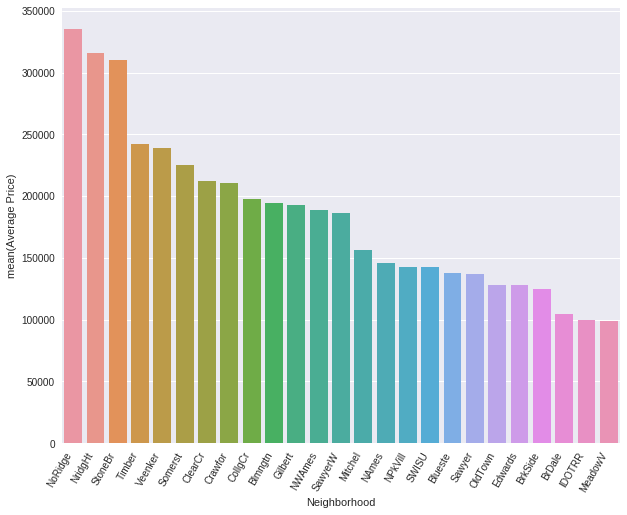

In [22]:
# Plotting the above results on graph

plt.figure(figsize=(10,8))
ax1=sns.barplot(x='Neighborhood', y='Average Price', data=price_locality)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha="right")

plt.show()

It can be clearly seen that average house price in NoRidge is greatest followed by NridgHt, StoneBr

#### We now know NoRidge is most expensive, is it also highest rated too?

In [23]:
####Visualization 4-- Highest Rated Quality Locality


line=res.map(lambda x:Row(Neighborhood=x[57],Quality_Rating=int(x[60])))
line=sqlcontext.createDataFrame(line)
quality_locality=line.groupBy('Neighborhood').avg('Quality_Rating').orderBy('avg(Quality_Rating)', ascending=False)
quality_locality=quality_locality.toPandas()
quality_locality.columns=['Neighborhood','Quality_Rating']

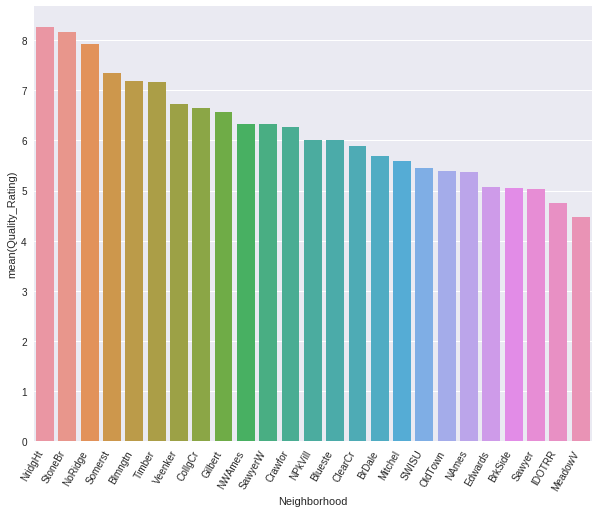

In [24]:
# Plotting the above results on graph

plt.figure(figsize=(10,8))
ax1=sns.barplot(x='Neighborhood', y='Quality_Rating', data=quality_locality)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha="right")
plt.show()

It tuns out NoRidge is not highest rated but NridgHt is.

#### Let us now see, how the house style varies among different localities

In [25]:
###Visualization 5--Average house price for different House Styles for various localities, in order to avoid clutter we have set a 
#limit

line=res.map(lambda x:Row(Neighborhood=x[57],HouseStyle=x[39],SalePrice=int(x[67])))
line=sqlcontext.createDataFrame(line)
price_locality_Housestyle=line.groupBy('Neighborhood','HouseStyle').avg('SalePrice').orderBy('Neighborhood', ascending=False).limit(20)
price_locality_Housestyle=price_locality_Housestyle.toPandas()
price_locality_Housestyle.columns=['Neighborhood','HouseStyle','Average Sales Price']

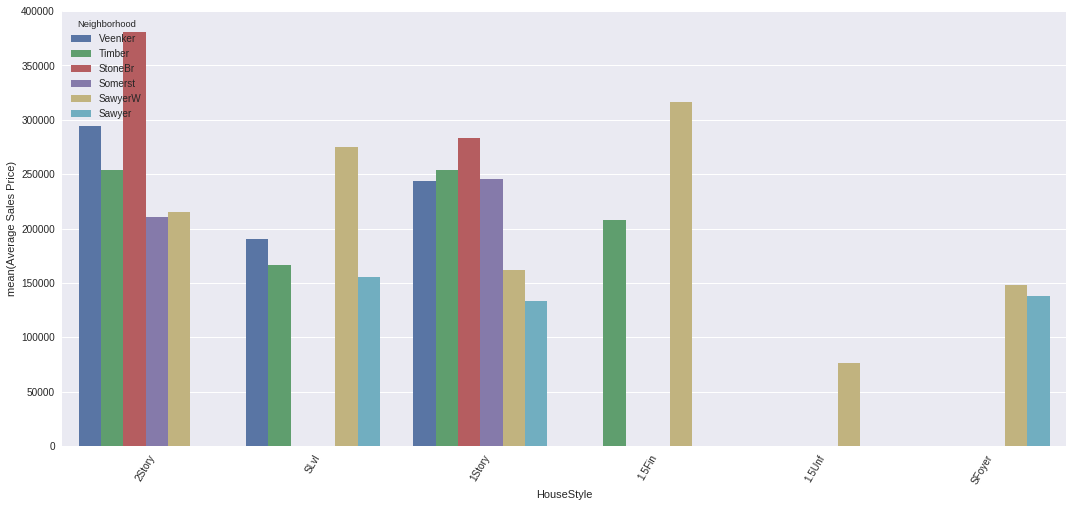

In [26]:
# Plotting the above results on graph

plt.figure(figsize=(18,8))
ax1 = sns.barplot(x='HouseStyle', y="Average Sales Price", data=price_locality_Housestyle,hue='Neighborhood')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60,ha="center")
plt.show()


#### Now we want see the average area for a particular type of house in various localities

In [27]:
##Visualization 6--Average Area for various house styles per location

line=res.map(lambda x:Row(Neighborhood=x[57],HouseStyle=x[39],GrLivArea=int(x[35])))
line=sqlcontext.createDataFrame(line)
area_locality_Housestyle=line.groupBy('Neighborhood','HouseStyle').avg('GrLivArea').orderBy('Neighborhood', ascending=False).limit(30)
area_locality_Housestyle=area_locality_Housestyle.toPandas()
area_locality_Housestyle.columns=['Neighborhood','HouseStyle','Average Living Area']
area_locality_Housestyle

,Neighborhood,HouseStyle,Average Living Area
0,Veenker,1Story,1435.250000
1,Veenker,2Story,2167.000000
2,Veenker,SLvl,1643.500000
3,Timber,SLvl,1348.250000
4,Timber,1.5Fin,1751.500000
5,Timber,1Story,1677.608696
6,Timber,2Story,2110.555556
7,StoneBr,1Story,1608.222222
8,StoneBr,2Story,2575.571429
9,Somerst,2Story,1652.489796


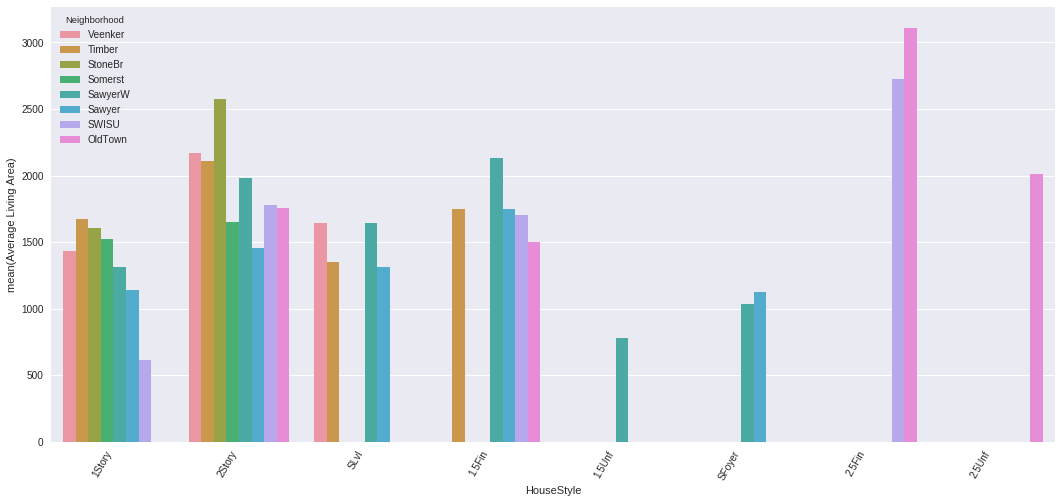

In [28]:
# Plotting the above results on graph

plt.figure(figsize=(18,8))
ax1 = sns.barplot(x='HouseStyle', y="Average Living Area", data=area_locality_Housestyle,hue='Neighborhood')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha="right")
plt.show()

# Identifying columns with NA Values

In [29]:
#Aashish
temp.filter(temp['Alley']=='NA').count()

1369

In [30]:
#Creating a dictionary and filtering NA values
temp_dict={}
for col in temp.columns:
    temp_dict[col]=temp.filter(temp[col]=='NA').count()

In [31]:
temp_dict.items()[0]

('MasVnrType', 8)

In [32]:
#Creating Dirty,Drop and Good columns
drop_columns=[]
dirty_columns=[]
good_columns=[]
for item in temp_dict.items():
    if item[1]>689:
        temp=temp.drop(item[0])
        drop_columns.append(item[0])
    elif item[1]==0:
        good_columns.append(item[0])
    else:
        dirty_columns.append(item[0])
        

In [33]:
drop_columns

['MiscFeature', 'PoolQC', 'FireplaceQu', 'Fence', 'Alley']

In [34]:
dirty_columns

['MasVnrType',
 'GarageQual',
 'GarageFinish',
 'GarageYrBlt',
 'Electrical',
 'BsmtQual',
 'BsmtExposure',
 'MasVnrArea',
 'GarageCond',
 'BsmtCond',
 'LotFrontage',
 'BsmtFinType2',
 'BsmtFinType1',
 'GarageType']

In [35]:
#Based on the dirty columns cleaning the NA values within the dataset.

temp.registerTempTable("new_temp")

t1=sqlcontext.sql("select * from new_temp where MasVnrType!='NA'")

t1.registerTempTable("new_temp")

t1=sqlcontext.sql("select * from new_temp where GarageQual!='NA'")

t1.registerTempTable("new_temp")

t1=sqlcontext.sql("select * from new_temp where GarageFinish!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where GarageYrBlt!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where Electrical!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where BsmtQual!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where BsmtExposure!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where MasVnrArea!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where GarageCond!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where BsmtFinType1!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where BsmtFinType2!='NA'")

t1.registerTempTable("new_temp")
t1=sqlcontext.sql("select * from new_temp where GarageType!='NA'")

In [36]:
temp_dict2={}
for col in t1.columns:
    temp_dict2[col]=t1.filter(t1[col]=='NA').count()

In [37]:
t1=t1.drop('LotFrontage')

In [38]:
t1.toPandas().iloc[0:5,70:]

,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,1999,2006,1588,0,0
1,1996,2009,804,670,0
2,1964,2008,798,813,0
3,2002,2009,630,0,0
4,1970,2009,1687,998,0


# Preprocessing the data and Value Encoding

In [39]:
# Getting Numerical Columns from the Spark Dataframe
num_cols=['BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch',' 	Fireplaces','FullBath','GarageArea','GarageCars','HalfBath','KitchenAbvGr','LotArea','LowQualFinSF','MSSubClass','MasVnrArea','MiscVal','MoSold','OpenPorchSF','OverallCond','OverallQual','PoolArea','SalePrice','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','firstFlrSF','secondFlrSF','threeSsnPorch']

In [40]:
#temp.registerTempTable("new_temp")
#clean_temp=sqlcontext.sql("select * from (select * from new_temp where MasVnrType!='NA') as s where s.Electrical!='NA'")

In [41]:
#Generating a list of Categorical columns
categoricalcols=[]
for col in t1.columns:
    if col in num_cols:
        pass
    else:
        categoricalcols.append(col)

# ENCODING

In [42]:
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import StringIndexer

In [43]:
flag=0
for col in categoricalcols:
    if flag != 1:
        indexer = StringIndexer(inputCol=col, outputCol=col+"_categorical").fit(t1)
        indexed_df = indexer.transform(t1)
        #indexed_df.drop("bar").show()
        #indexed_df.toPandas()
        flag=1
    else:
        indexer = StringIndexer(inputCol=col, outputCol=col+"_categorical").fit(indexed_df)
        indexed_df = indexer.transform(indexed_df)

In [44]:
df=indexed_df.toPandas()

In [45]:
len(indexed_df.columns)

120

In [46]:
#indexed_df.select(['MSZoning_categorical','MSZoning']).distinct().toPandas()

In [47]:
#Converting columns from string to Float which are of type string in the dataframe.
from pyspark.sql.functions import expr


indexed_df=indexed_df.withColumn("BedroomAbvGr", expr("CAST(BedroomAbvGr AS FLOAT)"))
indexed_df=indexed_df.withColumn("BsmtFinSF1", expr("CAST(BsmtFinSF1 AS FLOAT)"))
indexed_df=indexed_df.withColumn("BsmtFinSF2", expr("CAST(BsmtFinSF2 AS FLOAT)"))
indexed_df=indexed_df.withColumn("BsmtHalfBath", expr("CAST(BsmtHalfBath AS FLOAT)"))


indexed_df=indexed_df.withColumn("BsmtFullBath", expr("CAST(BsmtFullBath AS FLOAT)"))
indexed_df=indexed_df.withColumn("BsmtUnfSF", expr("CAST(BsmtUnfSF AS FLOAT)"))
indexed_df=indexed_df.withColumn("EnclosedPorch", expr("CAST(EnclosedPorch AS FLOAT)"))
indexed_df=indexed_df.withColumn("Fireplaces", expr("CAST(Fireplaces AS FLOAT)"))
indexed_df=indexed_df.withColumn("FullBath", expr("CAST(FullBath AS FLOAT)"))

indexed_df=indexed_df.withColumn("GarageArea", expr("CAST(GarageArea AS FLOAT)"))
indexed_df=indexed_df.withColumn("GarageCars", expr("CAST(GarageCars AS FLOAT)"))
indexed_df=indexed_df.withColumn("HalfBath", expr("CAST(HalfBath AS FLOAT)"))
indexed_df=indexed_df.withColumn("KitchenAbvGr", expr("CAST(KitchenAbvGr AS FLOAT)"))

indexed_df=indexed_df.withColumn("LotArea", expr("CAST(LotArea AS FLOAT)"))
indexed_df=indexed_df.withColumn("LowQualFinSF", expr("CAST(LowQualFinSF AS FLOAT)"))
indexed_df=indexed_df.withColumn("MSSubClass", expr("CAST(MSSubClass AS FLOAT)"))

indexed_df=indexed_df.withColumn("MasVnrArea", expr("CAST(MasVnrArea AS FLOAT)"))
indexed_df=indexed_df.withColumn("MoSold", expr("CAST(MoSold AS FLOAT)"))
indexed_df=indexed_df.withColumn("OverallCond", expr("CAST(OverallCond AS FLOAT)"))
indexed_df=indexed_df.withColumn("OverallQual", expr("CAST(OverallQual AS FLOAT)"))
indexed_df=indexed_df.withColumn("MiscVal", expr("CAST(MiscVal AS FLOAT)"))
indexed_df=indexed_df.withColumn("OpenPorchSF", expr("CAST(OpenPorchSF AS FLOAT)"))
indexed_df=indexed_df.withColumn("PoolArea", expr("CAST(PoolArea AS FLOAT)"))
indexed_df=indexed_df.withColumn("SalePrice", expr("CAST(SalePrice AS DOUBLE)"))
indexed_df=indexed_df.withColumn("ScreenPorch", expr("CAST(ScreenPorch AS FLOAT)"))
indexed_df=indexed_df.withColumn("TotRmsAbvGrd", expr("CAST(TotRmsAbvGrd AS FLOAT)"))
indexed_df=indexed_df.withColumn("TotalBsmtSF", expr("CAST(TotalBsmtSF AS FLOAT)"))
indexed_df=indexed_df.withColumn("WoodDeckSF", expr("CAST(WoodDeckSF AS FLOAT)"))
indexed_df=indexed_df.withColumn("firstFlrSF", expr("CAST(firstFlrSF AS FLOAT)"))
indexed_df=indexed_df.withColumn("secondFlrSF", expr("CAST(secondFlrSF AS FLOAT)"))
indexed_df=indexed_df.withColumn("threeSsnPorch", expr("CAST(threeSsnPorch AS FLOAT)"))
    

In [48]:
indexed_df.dtypes

[('BedroomAbvGr', 'float'),
 ('BldgType', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinSF1', 'float'),
 ('BsmtFinSF2', 'float'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinType2', 'string'),
 ('BsmtFullBath', 'float'),
 ('BsmtHalfBath', 'float'),
 ('BsmtQual', 'string'),
 ('BsmtUnfSF', 'float'),
 ('CentralAir', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('Electrical', 'string'),
 ('EnclosedPorch', 'float'),
 ('ExterCond', 'string'),
 ('ExterQual', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('Fireplaces', 'float'),
 ('Foundation', 'string'),
 ('FullBath', 'float'),
 ('Functional', 'string'),
 ('GarageArea', 'float'),
 ('GarageCars', 'float'),
 ('GarageCond', 'string'),
 ('GarageFinish', 'string'),
 ('GarageQual', 'string'),
 ('GarageType', 'string'),
 ('GarageYrBlt', 'string'),
 ('GrLivArea', 'string'),
 ('HalfBath', 'float'),
 ('Heating', 'string'),
 ('HeatingQC', 'string'),
 ('HouseStyle', 'string'),
 ('Id', 'st

In [49]:
#Getting total number of string columns
strcols=[]
for i in range(0,len(indexed_df.columns)):
    if (indexed_df.dtypes[i][1]=='string'):
        strcols.append(indexed_df.dtypes[i][0])

In [50]:
len(strcols)

44

In [51]:
indexed_df.select(strcols)

DataFrame[BldgType: string, BsmtCond: string, BsmtExposure: string, BsmtFinType1: string, BsmtFinType2: string, BsmtQual: string, CentralAir: string, Condition1: string, Condition2: string, Electrical: string, ExterCond: string, ExterQual: string, Exterior1st: string, Exterior2nd: string, Foundation: string, Functional: string, GarageCond: string, GarageFinish: string, GarageQual: string, GarageType: string, GarageYrBlt: string, GrLivArea: string, Heating: string, HeatingQC: string, HouseStyle: string, Id: string, KitchenQual: string, LandContour: string, LandSlope: string, LotConfig: string, LotShape: string, MSZoning: string, MasVnrType: string, Neighborhood: string, PavedDrive: string, RoofMatl: string, RoofStyle: string, SaleCondition: string, SaleType: string, Street: string, Utilities: string, YearBuilt: string, YearRemodAdd: string, YrSold: string]

In [52]:
indexed_df.columns

['BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'SaleType',
 'ScreenPorch',
 'Street',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'Utilities

In [53]:
#MAtplotlib
#indexed_df.columns

In [54]:
for i in strcols:
    indexed_df= indexed_df.drop(i)
    

In [55]:
len(indexed_df.columns)

76

In [56]:
model_df = indexed_df.drop('SalePrice')

In [57]:
indexed_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
BedroomAbvGr,1338,2.8647234678624813,0.7766771115395772,0.0,6.0
BsmtFinSF1,1338,464.23467862481317,458.7924202727304,0.0,5644.0
BsmtFinSF2,1338,49.21823617339312,166.19658425664755,0.0,1474.0
BsmtFullBath,1338,0.43871449925261585,0.5156304743151041,0.0,2.0
BsmtHalfBath,1338,0.06053811659192825,0.24168507877908618,0.0,2.0
BsmtUnfSF,1338,582.4947683109118,439.9505279723051,0.0,2336.0
EnclosedPorch,1338,21.263826606875934,60.84396383442114,0.0,552.0
Fireplaces,1338,0.648729446935725,0.6453926463463608,0.0,3.0
FullBath,1338,1.5754857997010463,0.5475695495011645,0.0,3.0


# Linear Regression Mean Model implementation

In [58]:
#Akash
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [59]:
g=[]
for col in indexed_df.columns:
    if col=='SalePrice':
        continue
    else:
        g.append(col)
    

In [60]:
vectorAssembler = VectorAssembler(inputCols = g, outputCol = 'features')
vhouse_df = vectorAssembler.transform(indexed_df)

In [61]:
type(vhouse_df)

pyspark.sql.dataframe.DataFrame

In [62]:
vhouse_df.select(['features','SalePrice']).toPandas()

,features,SalePrice
0,"(3.0, 1162.0, 0.0, 0.0, 0.0, 426.0, 0.0, 0.0, ...",214000.0
1,"(3.0, 0.0, 0.0, 0.0, 0.0, 384.0, 0.0, 1.0, 2.0...",168500.0
2,"(4.0, 674.0, 106.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1...",167900.0
3,"(1.0, 515.0, 0.0, 1.0, 0.0, 115.0, 0.0, 0.0, 1...",86000.0
4,"(5.0, 523.0, 0.0, 1.0, 0.0, 301.0, 0.0, 2.0, 2...",197000.0
5,"(3.0, 0.0, 0.0, 0.0, 0.0, 798.0, 0.0, 0.0, 2.0...",183000.0
6,"(3.0, 616.0, 0.0, 0.0, 0.0, 248.0, 0.0, 0.0, 1...",120500.0
7,"(2.0, 0.0, 0.0, 0.0, 0.0, 648.0, 0.0, 0.0, 1.0...",116000.0
8,"(2.0, 623.0, 121.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1...",125000.0
9,"(3.0, 0.0, 0.0, 0.0, 0.0, 1694.0, 0.0, 0.0, 2....",245350.0


In [63]:
from pyspark.ml.regression import LinearRegression

In [64]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [65]:
lr = LinearRegression(featuresCol = 'features', labelCol='SalePrice', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [66]:
lr_model = lr.fit(train_df)

In [67]:
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-2940.80240808,6.76149918489,4.03544321451,7458.36844995,4950.54288051,0.47308359485,-9.76371422185,4980.4975211,10179.9916331,13.5838321076,10386.3848206,3187.82104499,-11145.3299893,0.416584939089,24.5094637418,-176.100188747,44.1449600604,0.0,-404.116255814,-0.0,4501.88529916,15026.5025781,-75.6862844101,54.9964116879,5635.62908748,13.7663633287,29.0197235345,18.6047933359,21.5302598391,39.6487615372,-1588.75005171,-3037.04224921,3402.77328054,-163.82609064,-464.119099064,5384.81231788,-7428.12857564,-4369.06064495,-7969.09574519,1373.60221228,-839.139500201,13932.226382,444.282491246,138.766659923,2614.6240506,-4492.52013243,-2536.90703244,-5078.8837686,470.844967352,10565.3542246,1042.2449249,48.9079144322,4.29985626123,-3645.68137329,-2462.2273284,465.986597009,-1.06421494845,9435.3818104,1448.00242603,-2085.70363727,704.528113271,-634.832760153,-311.882402786,-6348.32057054,716.409920692,-10186.4625052,-20423.2728924,4863.77733904,-2020.00116826,3389.21461866,-603

In [68]:
lr_predictions=lr_model.transform(test_df)

/usr/lib/spark/python/pyspark/ml/regression.py:123: UserWarning: weights is deprecated. Use coefficients instead.
  warnings.warn("weights is deprecated. Use coefficients instead.")


In [69]:
lr_predictions.select(['prediction','features','SalePrice']).toPandas()

,prediction,features,SalePrice
0,164000.877992,"(1.0, 662.0, 0.0, 1.0, 0.0, 186.0, 0.0, 1.0, 1...",144500.0
1,153676.110832,"(2.0, 0.0, 0.0, 0.0, 0.0, 600.0, 0.0, 0.0, 2.0...",147400.0
2,155062.696882,"(2.0, 0.0, 0.0, 0.0, 0.0, 600.0, 0.0, 0.0, 2.0...",151000.0
3,207782.255628,"(2.0, 0.0, 0.0, 0.0, 0.0, 880.0, 0.0, 1.0, 2.0...",191000.0
4,103701.092343,"(2.0, 0.0, 0.0, 0.0, 0.0, 952.0, 0.0, 1.0, 1.0...",121000.0
5,174902.329274,"(2.0, 0.0, 0.0, 0.0, 0.0, 952.0, 205.0, 2.0, 2...",129900.0
6,111161.800214,"(2.0, 0.0, 0.0, 0.0, 0.0, 988.0, 0.0, 0.0, 1.0...",113000.0
7,176189.196051,"(2.0, 0.0, 0.0, 0.0, 0.0, 1442.0, 0.0, 1.0, 2....",185000.0
8,203251.162449,"(2.0, 24.0, 0.0, 0.0, 0.0, 1346.0, 0.0, 1.0, 2...",202500.0
9,70148.832515,"(2.0, 104.0, 712.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1...",110000.0


In [70]:
#Evaluating R squared on test data for the Mean Model.
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="SalePrice",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.825681


# Regularization.

In [71]:

#Creating a Correlation Dictionary to select the best positively and negatively Correlated values.
correlation_dict={}

In [72]:
for col in indexed_df.columns:
    correlation_dict[col]=indexed_df.corr(col1='SalePrice',col2=col)

In [73]:
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
import operator
#x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_dict = sorted(correlation_dict.items(), key=operator.itemgetter(1),reverse=True)

In [74]:
sorted_dict[0:15][0][0]

'SalePrice'

In [75]:
sorted_dict[-5:]

[('YearBuilt_categorical', -0.2584674862545119),
 ('GarageYrBlt_categorical', -0.3069782036198707),
 ('HeatingQC_categorical', -0.3512288079018139),
 ('BsmtFinType1_categorical', -0.3683682843913952),
 ('Foundation_categorical', -0.4407291985248346)]

In [76]:
#Creating new_col_list which joins the slices created above.
new_col_list=sorted_dict[0:15]+sorted_dict[-5:]

In [77]:
collist=[]
for item in new_col_list:
    if item[0]=='SalePrice':
        continue
    else:
        collist.append(item[0])

In [78]:
#Getting Correlation within the columns of collist. 
f=indexed_df.select(collist).toPandas().corr()

In [79]:
import seaborn as sns

In [80]:
#Creating heatmap for visualizing the correlated columns so that we can eliminate auto-correlation.
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

In [81]:
sns.heatmap(data=f)

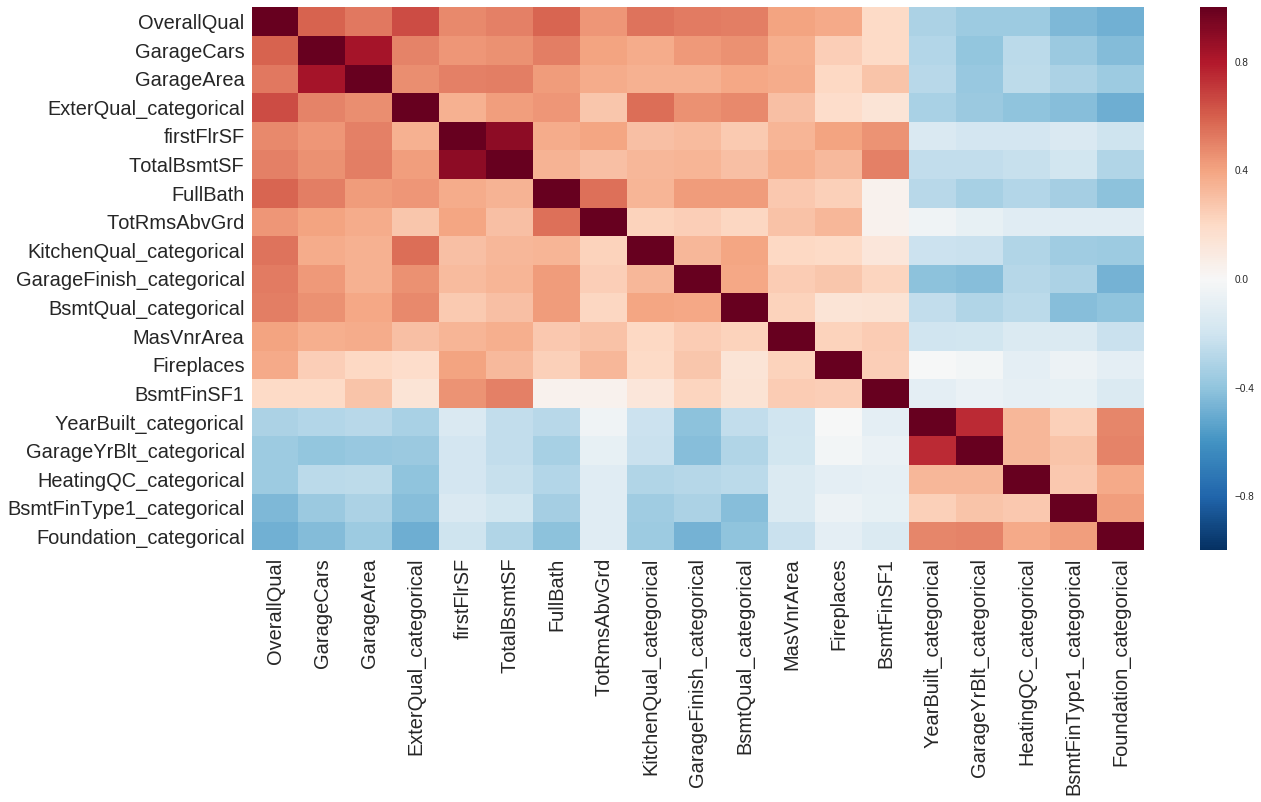

In [82]:
plt.show()#['GrLivArea','TotRmsAbvGrd'],['GrageCars','GarageArea'],[''firstFlrSF','TotalBsmtSF'],[FullBath,GrLivArea],[FullBath,TotRmsAbvGrd],[OverallQual,GrLivArea],[OverallQual,GarageCars],[BsmtFinSF1,TotalBsmtSF],[MasVnrArea,MasVnrType_categorical],[Foundation_categorical,OverallQual],[KitchenQual_categorical,ExterQual_categorical]

In [83]:
#['GrLivArea','TotRmsAbvGrd'],['GarageCars','GarageArea'],[''firstFlrSF','TotalBsmtSF'],[FullBath,GrLivArea],[FullBath,TotRmsAbvGrd],[OverallQual,GrLivArea],[OverallQual,GarageCars],[BsmtFinSF1,TotalBsmtSF],[MasVnrArea,MasVnrType_categorical],[Foundation_categorical,OverallQual],[KitchenQual_categorical,ExterQual_categorical]

In [84]:
#Checking for the darkest spots for autocorrelaton 
indexed_df.corr(col1='OverallQual', col2='firstFlrSF')

0.48197791036291215

In [85]:
#Dropping columns which have lesser correlation within the auto correlation.
new_indexed_df=indexed_df.drop('GrLivArea')
new_indexed_df=new_indexed_df.drop('GarageCars')
new_indexed_df=new_indexed_df.drop('FullBath')
new_indexed_df=new_indexed_df.drop('BsmtFinSF1')
new_indexed_df=new_indexed_df.drop('MasVnrType_categorical')
new_indexed_df=new_indexed_df.drop('Foundation_categorical')
new_indexed_df=new_indexed_df.drop('KitchenQual_categorical')

In [86]:
#Running the Feature selected model and checking for R squared Value.

g=[]
for col in new_indexed_df.columns:
    if col=='SalePrice':
        continue
    else:
        g.append(col)
    

vectorAssembler = VectorAssembler(inputCols = g, outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_indexed_df)
#vectorAssembler = VectorAssembler(inputCols = ['SalePrice'], outputCol = 'label')


splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

lr = LinearRegression(featuresCol = 'features', labelCol='SalePrice', maxIter=10, regParam=0.3, elasticNetParam=1.0)

lr_model = lr.fit(train_df)



print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-3181.81396508,3.22613549492,8139.92816894,3893.78823976,-7.73902998005,-18.5805206177,1503.87554635,52.8175317607,850.47551855,-6470.65882871,0.351430518678,-57.4998250309,-130.338930353,27.0194023156,-0.448336114373,201.850988294,15.4120913488,5029.53066747,17614.3475335,41.9544974033,44.4372063706,5664.28616264,17.5556925714,19.3535093158,28.9820867799,35.6920711461,58.6487972847,-1346.0433232,-3916.51452148,3762.64398498,-1021.73685955,-492.636440853,8244.63267105,-8036.24687732,-3145.4676159,-8111.43837797,3096.09147862,-2799.39052754,15946.319158,-485.506884321,904.560445775,2616.98633903,-5989.65549771,-3990.44972371,3174.91267456,2009.77746343,1355.53978532,18.8602192836,8.18138438623,880.826072769,-1370.37650057,-1391.3668805,0.292411300403,0.0,10469.0277436,2699.91217643,-215.936218876,-3542.69869997,600.765418358,-3006.13470868,-24338.435389,2423.94801734,-2536.02659092,3487.80284383,-64206.0813226,0.0,14.888786937,-53.8006280374,-112.607841248]
Intercept: -89

In [87]:
lr_predictions=lr_model.transform(test_df)

In [88]:
#Creating Predictions based on transformed dataframe.
lr_predictions.select(['prediction','features','SalePrice']).toPandas()

,prediction,features,SalePrice
0,73675.153170,"(1.0, 0.0, 1.0, 0.0, 115.0, 0.0, 0.0, 286.0, 0...",86000.0
1,162136.960658,"(1.0, 0.0, 1.0, 0.0, 186.0, 0.0, 1.0, 420.0, 0...",144500.0
2,237548.192935,"(1.0, 0.0, 1.0, 0.0, 254.0, 0.0, 2.0, 484.0, 0...",289000.0
3,142061.564098,"(2.0, 0.0, 0.0, 0.0, 0.0, 244.0, 0.0, 456.0, 0...",124900.0
4,132438.341205,"(2.0, 0.0, 0.0, 0.0, 117.0, 0.0, 0.0, 600.0, 0...",123000.0
5,142750.423840,"(2.0, 0.0, 0.0, 0.0, 318.0, 0.0, 0.0, 528.0, 1...",173733.0
6,128812.009828,"(2.0, 0.0, 0.0, 0.0, 321.0, 0.0, 0.0, 264.0, 1...",118000.0
7,125853.607783,"(2.0, 0.0, 0.0, 0.0, 624.0, 0.0, 0.0, 484.0, 0...",105900.0
8,110025.305987,"(2.0, 0.0, 0.0, 0.0, 625.0, 0.0, 0.0, 436.0, 0...",128000.0
9,162722.396474,"(2.0, 0.0, 0.0, 0.0, 625.0, 0.0, 0.0, 625.0, 1...",171900.0


In [89]:
lr_evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="SalePrice",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.84879


# Generating a test model for which feature is best correlated i.e OverallQual and seeing how LogPrice is distributed.

In [90]:
vectorAssembler = VectorAssembler(inputCols =['OverallQual'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(indexed_df)

In [91]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [92]:
lr = LinearRegression(featuresCol = 'features', labelCol='SalePrice', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [93]:
lr_model = lr.fit(train_df)

In [94]:
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [46032.1711967]
Intercept: -100549.278139


In [95]:
lr_predictions=lr_model.transform(test_df)

In [96]:
#Evaluating R squared on test data for the Mean Model.
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="SalePrice",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.573736


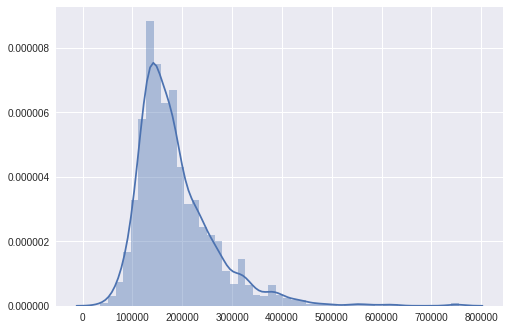

In [100]:
sns.distplot(indexed_df.select('SalePrice').toPandas())
plt.show()

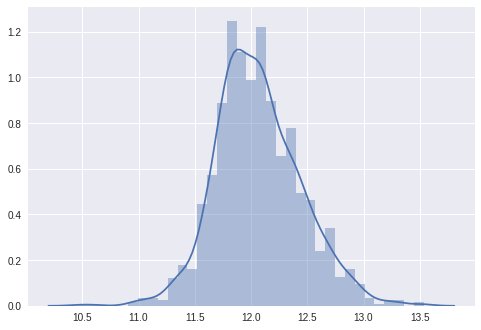

In [101]:
sns.distplot(np.log(indexed_df.select('SalePrice').toPandas()))
plt.show()

In [102]:
second_df=indexed_df.toPandas()

In [103]:
second_df['Log_SalePrice']=np.log(second_df['SalePrice'])

In [104]:
df=sqlcontext.createDataFrame(second_df)

In [105]:
df=df.drop('SalePrice')

In [156]:
#Running Regression based on feature as OverallQual and Log_SalePrice. 

g=[]
for col in df.columns:
    if col=='Log_SalePrice':
        continue
    else:
        g.append(col)
    

vectorAssembler = VectorAssembler(inputCols = g, outputCol = 'features')
vhouse_df = vectorAssembler.transform(df)
#vectorAssembler = VectorAssembler(inputCols = ['SalePrice'], outputCol = 'label')


splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

lr = LinearRegression(featuresCol = 'features', labelCol='Log_SalePrice', maxIter=10, regParam=0.3, elasticNetParam=0.8)

lr_model = lr.fit(train_df)

In [157]:
print("Coefficients: " + str(lr_model.coefficients))

Coefficients: (75,[21],[0.0494013059025])


In [158]:
print("Intercept: " + str(lr_model.intercept))

Intercept: 11.7629871163


In [159]:
lr_predictions=lr_model.transform(test_df)

In [160]:
lr_evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.240839


In [115]:
#It appears that the Regression based on Overall Quality is adding the most value to the model and can itself be used for prefiction.

# Implementing Decision Tree.

In [116]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree

def labelData(data):
    # label: row[end], features: row[0:end-1]
    return data.map(lambda row: LabeledPoint(row[-1], row[:-1]))

training_data, testing_data = labelData(vhouse_df).randomSplit([0.8, 0.2])


In [117]:
from pyspark.ml.regression import DecisionTreeRegressor

In [136]:
dt=DecisionTreeRegressor(featuresCol='features',labelCol='Log_SalePrice',maxDepth=2)

In [137]:
dt_model=dt.fit(train_df)

In [138]:
dt_predictions=dt_model.transform(test_df)

In [139]:

dt_evaluator1 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="r2")

dt_evaluator2 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="mse")
dt_evaluator3 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="mae")
print("R Squared (R2) on test data = %g" % dt_evaluator1.evaluate(dt_predictions))
print("Absolute Error on test data = %g" % dt_evaluator3.evaluate(dt_predictions))
print("Mean Square Error on test data = %g" % dt_evaluator2.evaluate(dt_predictions))

R Squared (R2) on test data = 0.635258
Absolute Error on test data = 0.165993
Mean Square Error on test data = 0.0502868


In [140]:
from pyspark.ml.regression import RandomForestRegressor

In [146]:
rf=RandomForestRegressor(featuresCol='features',labelCol='Log_SalePrice',maxDepth=3,numTrees=100)

In [147]:
rf_model=rf.fit(train_df)

In [148]:
rf_predictions=rf_model.transform(test_df)

In [149]:

rf_evaluator1 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="r2")

rf_evaluator2 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="mse")
rf_evaluator3 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="mae")
print("R Squared (R2) on test data = %g" % rf_evaluator1.evaluate(rf_predictions))
print("Absolute Error on test data = %g" % rf_evaluator3.evaluate(rf_predictions))
print("Mean Square Error on test data = %g" % rf_evaluator2.evaluate(rf_predictions))

R Squared (R2) on test data = 0.761752
Absolute Error on test data = 0.129586
Mean Square Error on test data = 0.0328471


# Implementing Gradient Bossting Regressor 

In [150]:
from pyspark.ml.regression import GBTRegressor

In [151]:
gbt=GBTRegressor(featuresCol='features',labelCol='Log_SalePrice',maxDepth=3,maxIter=100)

In [152]:
gbt_model=gbt.fit(train_df)

In [153]:
gbt_predictions=gbt_model.transform(test_df)

In [155]:

gbt_evaluator1 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="r2")

gbt_evaluator2 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="mse")
gbt_evaluator3 = RegressionEvaluator(predictionCol="prediction",labelCol="Log_SalePrice",metricName="mae")
print("R Squared (R2) on test data = %g" % gbt_evaluator1.evaluate(gbt_predictions))
print("Absolute Error on test data = %g" % gbt_evaluator3.evaluate(gbt_predictions))
print("Mean Square Error on test data = %g" % gbt_evaluator2.evaluate(gbt_predictions))

R Squared (R2) on test data = 0.848761
Absolute Error on test data = 0.102093
Mean Square Error on test data = 0.0208512


## We conclude from the above : 


#### R Squared (R2) on test data in case of Gradient Boosting  = 0.848761
#### R Squared (R2) on test data in case of D Tree = 0.635258
#### R Squared (R2) on test data for mean model in Regression = 0.825681
#### R Squared (R2) on test data for feature extracted columns = 0.240839
#### R Squared (R2) on test data for best correlated variable i.e OverallQual = 0.573636



### However, we achieve the best R Squared in case of Linear regression where we do not drop any columns.